## Import Library

In [25]:
import os
import pandas as pd
import re
import html
import numpy as np
import string

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [26]:
base_dir = '/content/drive/MyDrive/ML/indonesia_ai/project_1/'
dt = os.path.join(base_dir, 'tweet.csv')
df = pd.read_csv(dt,encoding='utf-8')

In [27]:
# show all text
pd.set_option('display.max_colwidth', None)

In [28]:
# text display rata kiri
# df.head().style.set_properties(**{'text-align': 'left'})
df.head()

,Unnamed: 0,sentimen,tweet
0,0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


In [29]:
df_1 = df.copy()

<ipython-input-30-31a115d56f71>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_1, x='sentimen', palette='viridis')


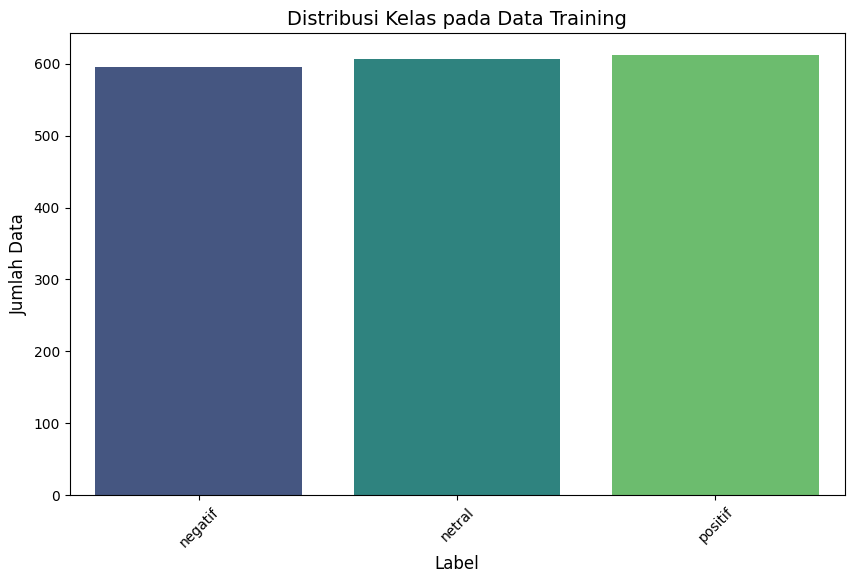

In [30]:
# Membuat Visualisasi Distribusi Kelas
plt.figure(figsize=(10, 6))
sns.countplot(data=df_1, x='sentimen', palette='viridis')
plt.title('Distribusi Kelas pada Data Training', fontsize=14)
plt.xlabel('Label', fontsize=12)
plt.ylabel('Jumlah Data', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [31]:
df_1['tweet_old'] = df_1['tweet']
df_1.head()

,Unnamed: 0,sentimen,tweet,tweet_old
0,0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦","Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ","Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp","Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!","Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak","Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


### 0. Drop column

In [32]:
df_1 = df.drop(df.columns[0], axis=1)
df_1.head()

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


### 1. Delete Hastag

In [33]:
hashtag_regex = r"#(\w+)"
df_1['tweet'] = df_1['tweet'].astype(str)
df_1['tweet'] = df_1['tweet'].apply(lambda text: re.sub(hashtag_regex, '', text))
df_1.head()

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


### 2. Delete mention

In [34]:
# Define regular expression to find mentions
mention_regex = r"@(\w+)"
df_1['tweet'] = df_1['tweet'].apply(lambda text: re.sub(mention_regex, '', text))
df_1.head()

,sentimen,tweet
0,negatif,"Kata Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan ?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


### 3. Delete URL

In [35]:
# Define regular expression to find URLs
url_regex = r"https?://\S+|www\.\S+"

# Remove URLs using regular expression substitution
df_1['tweet'] = df_1['tweet'].apply(lambda text: re.sub(url_regex, '', text))
df_1.head()

,sentimen,tweet
0,negatif,"Kata Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan ?ðŸ˜œ â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy?"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


### 4. Lowercase

In [36]:
# Convert full_text to lowercase
df_1['tweet'] = df_1['tweet'].str.lower()
df_1.head()

,sentimen,tweet
0,negatif,"kata indonesia tidak dihargai bangsa asing! berita ini ðÿ‘‡ pasti hoax buatan penguasa, ya kan ?ðÿ˜œ â€¦"
1,netral,"batuan langka, tasbih jokowi hadiah dari habib luthfi seharga mercy?"
2,netral,"di era jokowi, ekonomi indonesia semakin baik. pic.twitter.com/w2ythnxstp"
3,positif,"bagi sumatera selatan, asian games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. indonesia maju, jokowi hebat!"
4,negatif,"negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. penghasilan negara itu ya dari pajak"


### 5. cek Duplicate

In [37]:
print("Jumlah duplicate rows:", df_1.duplicated(subset=['tweet']).sum())

Jumlah duplicate rows: 0


### 6. Delete except alphabet, numeric, punctuation

In [38]:
def clean_text(text):
    # Menghapus karakter selain huruf, angka, dan tanda baca
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s\.,!?]', '', text)
    return cleaned_text

In [39]:
df_1['tweet'] = df_1['tweet'].apply(clean_text)
df_1.head()

,sentimen,tweet
0,negatif,"kata indonesia tidak dihargai bangsa asing! berita ini pasti hoax buatan penguasa, ya kan ?"
1,netral,"batuan langka, tasbih jokowi hadiah dari habib luthfi seharga mercy?"
2,netral,"di era jokowi, ekonomi indonesia semakin baik. pic.twitter.comw2ythnxstp"
3,positif,"bagi sumatera selatan, asian games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. indonesia maju, jokowi hebat!"
4,negatif,"negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. penghasilan negara itu ya dari pajak"


In [40]:
df_1['tweet'] = df_1['tweet'].astype(str)

In [41]:
df_1

,sentimen,tweet
0,negatif,"kata indonesia tidak dihargai bangsa asing! berita ini pasti hoax buatan penguasa, ya kan ?"
1,netral,"batuan langka, tasbih jokowi hadiah dari habib luthfi seharga mercy?"
2,netral,"di era jokowi, ekonomi indonesia semakin baik. pic.twitter.comw2ythnxstp"
3,positif,"bagi sumatera selatan, asian games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. indonesia maju, jokowi hebat!"
4,negatif,"negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. penghasilan negara itu ya dari pajak"
...,...,...
1810,netral,negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat
1811,netral,1. hrs ceramah di damai indonesiaku 2. perekonomian makin membaik.
1812,netral,mari bangun bangsa dgn mendukung perekonomian negara bersama pak jokowi. ayo kerja!
1813,netral,"bantu majukan perekonomian bangsa bersama pak jokowi, yuk!"


In [42]:
sentiment_map = {'negatif': 0, 'netral': 1, 'positif': 2}
df_1['sentimen'] = df_1['sentimen'].map(sentiment_map)

### delete karakter selain huruf

In [43]:
# Fungsi untuk membersihkan teks
def preprocess_text(text):
    # Menghapus angka, simbol, dan mengonversi ke lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

# Mengolah kolom 'text' untuk membersihkan stopwords dan stemming
df_1['tweet'] = df_1['tweet'].apply(preprocess_text)

In [44]:
df_1.head()

,sentimen,tweet
0,0,kata indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan
1,1,batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy
2,1,di era jokowi ekonomi indonesia semakin baik pictwittercomw2ythnxstp
3,2,bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 185 triliun indonesia maju jokowi hebat
4,0,negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak


In [45]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)  # remove hashtags
    text = re.sub(r'RT[\s]', '', text)         # remove RT
    text = re.sub(r"http\S+", '', text)        # remove links
    text = re.sub(r'\d+', '', text)            # remove numbers

    text = text.replace('\n', ' ')  # replace new line with space
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove all punctuations
    text = text.strip()  # remove spaces from both left and right
    return text

# Terapkan fungsi cleaningText ke kolom 'tweet' dalam DataFrame
df_1['tweet'] = df_1['tweet'].apply(cleaningText)

### Stemming

In [46]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [47]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [48]:
# Membuat stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Menghapus tanda baca dan stemming
def preprocess_stemmed(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = stemmer.stem(text)
    return text

In [49]:
df_1['tweet'] = df_1['tweet'].apply(preprocess_stemmed)

In [50]:
df_1.head()

,sentimen,tweet
0,0,kata indonesia tidak harga bangsa asing berita ini pasti hoax buat kuasa ya kan
1,1,batu langka tasbih jokowi hadiah dari habib luthfi harga mercy
2,1,di era jokowi ekonomi indonesia makin baik pictwittercomwythnxstp
3,2,bagi sumatera selatan asi games dampak pd ekonomi langsung prediksi capai triliun indonesia maju jokowi hebat
4,0,negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakat ngeluh karena negara ngutang tiap negara itu pasti ngutang utang bisa bayar kalo negara dapet hasil hasil negara itu ya dari pajak


In [51]:
save_path = os.path.join(base_dir, 'tweet_preprocessed.csv')
df_1.to_csv(save_path, index=False)

### slang handling

In [60]:
pip install indoNLP

In [61]:
from indoNLP.preprocessing import replace_slang, replace_word_elongation

In [62]:
df_1.iloc[80:83]

,sentimen,tweet
80,0,contoh ekonomi china bukan sujud seperti sekarang ini
81,2,fyi gaesberbagai capai telah hasil capai khusus tumbuh ekonomi di era perintah jika sangat jauh tingkat
82,1,percaya hanya beri pada mereka yang alam orang milik wakil yang alam bidang ekonomi


In [63]:
df_1['tweet'] = df_1['tweet'].apply(replace_slang)

In [64]:
df_1.iloc[80:83]

,sentimen,tweet
80,0,contoh ekonomi china bukan sujud seperti sekarang ini
81,2,fyi gaesberbagai capai telah hasil capai khusus tumbuh ekonomi di era perintah jika sangat jauh tingkat
82,1,percaya hanya beri pada mereka yang alam orang milik wakil yang alam bidang ekonomi


### typo handling

In [65]:
df_1.iloc[174:175]

,sentimen,tweet
174,1,ya mengapai juga gaji kan sudah kayak raya cong paling ngambil dikit saja enggak apa-apa kata kalo cuma dikit hehe salam dua jari prabowo sandi


In [66]:
df_1['tweet'] = df_1['tweet'].apply(replace_word_elongation)

In [68]:
df_1.iloc[174:175]

,sentimen,tweet
174,1,ya mengapai juga gaji kan sudah kayak raya cong paling ngambil dikit saja enggak apa-apa kata kalo cuma dikit hehe salam dua jari prabowo sandi


## Modeling

In [69]:
train_df, temp_df = train_test_split(df_1, test_size=0.2, stratify=df_1['sentimen'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['sentimen'], random_state=42)

print(f"Train size: {len(train_df)}, Validation size: {len(val_df)}, Test size: {len(test_df)}")

Train size: 1452, Validation size: 181, Test size: 182


### Tokenizasi & Padding

In [73]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [74]:
# Tokenisasi dan padding
max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['tweet'])

train_sequences = tokenizer.texts_to_sequences(train_df['tweet'])
val_sequences = tokenizer.texts_to_sequences(val_df['tweet'])
test_sequences = tokenizer.texts_to_sequences(test_df['tweet'])

train_padded = pad_sequences(train_sequences, maxlen=max_len)
val_padded = pad_sequences(val_sequences, maxlen=max_len)
test_padded = pad_sequences(test_sequences, maxlen=max_len)

train_labels = train_df['sentimen'].values
val_labels = val_df['sentimen'].values
test_labels = test_df['sentimen'].values

### Make Bi-LSTM model

In [75]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 bidirectional (Bidirection  (None, 100, 128)          98816     
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 100, 128)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1478019 (5.64 MB)
Trainable params: 147801

In [76]:
history = model.fit(
    train_padded,
    train_labels,
    epochs=10,
    batch_size=32,
    validation_data=(val_padded, val_labels),
    verbose=1
)

Epoch 1/10
46/46 [==============================] - 26s 344ms/step - loss: 1.0534 - accuracy: 0.4242 - val_loss: 0.9964 - val_accuracy: 0.5249
Epoch 2/10
46/46 [==============================] - 13s 290ms/step - loss: 0.8060 - accuracy: 0.6722 - val_loss: 0.9506 - val_accuracy: 0.5801
Epoch 3/10
46/46 [==============================] - 13s 274ms/step - loss: 0.4274 - accuracy: 0.8450 - val_loss: 1.1266 - val_accuracy: 0.5967
Epoch 4/10
46/46 [==============================] - 14s 295ms/step - loss: 0.1877 - accuracy: 0.9415 - val_loss: 1.5992 - val_accuracy: 0.5470
Epoch 5/10
46/46 [==============================] - 14s 314ms/step - loss: 0.1187 - accuracy: 0.9628 - val_loss: 1.6490 - val_accuracy: 0.5470
Epoch 6/10
46/46 [==============================] - 16s 342ms/step - loss: 0.1144 - accuracy: 0.9621 - val_loss: 1.5649 - val_accuracy: 0.6022
Epoch 7/10
46/46 [==============================] - 14s 310ms/step - loss: 0.0818 - accuracy: 0.9766 - val_loss: 1.8269 - val_accuracy: 0.5414

### Evaluate model

In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [77]:
# Evaluasi model
loss, accuracy = model.evaluate(test_padded, test_labels, verbose=1)
print(f'Test Accuracy: {accuracy}')

# Prediksi pada data baru
new_tweet = ["Saya sangat senang hari ini!"]
new_tweet_preprocessed = preprocess_text(new_tweet[0])
new_seq = tokenizer.texts_to_sequences([new_tweet_preprocessed])
new_padded = pad_sequences(new_seq, maxlen=max_len)
prediction = model.predict(new_padded)
predicted_sentiment = np.argmax(prediction, axis=1)

sentiment_labels = {0: 'negatif', 1: 'netral', 2: 'positif'}
print(f'Predicted Sentiment: {sentiment_labels[predicted_sentiment[0]]}')


6/6 [==============================] - 0s 62ms/step - loss: 2.2070 - accuracy: 0.5495
Test Accuracy: 0.5494505763053894
1/1 [==============================] - 2s 2s/step
Predicted Sentiment: positif


In [82]:
score, acc = model.evaluate(test_padded, test_labels, batch_size=1)
print('Test score:', score)
print('Test accuracy:', acc)

182/182 [==============================] - 12s 64ms/step - loss: 2.2070 - accuracy: 0.5495
Test score: 2.2069661617279053
Test accuracy: 0.5494505763053894


In [85]:
y_pred = model.predict(test_padded)
pred = np.argmax(y_pred, axis=1)
ground = np.argmax(test_labels)

6/6 [==============================] - 2s 273ms/step


In [93]:
test_labels

array([2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 2, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2,
       1, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2, 1,
       2, 0, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 0, 2, 1, 2, 1, 0,
       0, 2, 1, 1, 2, 0, 0, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 1, 2, 0, 1,
       2, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0, 0, 1, 2, 0, 0, 1,
       2, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0,
       0, 1, 2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 1, 0, 1, 2, 2])

In [88]:
LABEL = ['Negatif', 'Neutral', 'Positif']

In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
print(classification_report(ground, pred, target_names=LABEL))

TypeError: Singleton array 0 cannot be considered a valid collection.